# UK & US FASHION DATASET

In [284]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('whitegrid')

In [285]:
df = pd.read_csv("D:\Open Classroom\Datasets\Fashion Dataset UK-US\mock_fashion_data_uk_us.csv")
df.head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27.0,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50.0,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23.0,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261634 entries, 0 to 261633
Data columns (total 20 columns):
Product Name                    261634 non-null object
Price                           261634 non-null float64
Brand                           261634 non-null object
Category                        261634 non-null object
Description                     261634 non-null object
Rating                          261634 non-null float64
Review Count                    261634 non-null int64
Style Attributes                261634 non-null object
Total Sizes                     261633 non-null object
Available Sizes                 261633 non-null object
Color                           261633 non-null object
Purchase History                261633 non-null object
Age                             261633 non-null float64
Fashion Magazines               261633 non-null object
Fashion Influencers             261633 non-null object
Season                          261633 non-null object
Time Pe

In [287]:
df.isnull().sum()

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     1
Available Sizes                 1
Color                           1
Purchase History                1
Age                             1
Fashion Magazines               1
Fashion Influencers             1
Season                          1
Time Period Highest Purchase    1
Customer Reviews                1
Social Media Comments           1
feedback                        1
dtype: int64

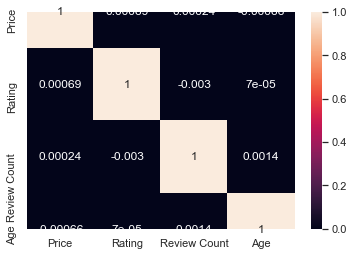

In [288]:
sb.heatmap(df.corr(), annot=True)

In [289]:
df.head(3)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27.0,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral


In [290]:
df['Style Attributes'].value_counts()

Sporty        26378
Edgy          26319
Bohemian      26227
Casual        26212
Glamorous     26199
Minimalist    26135
Formal        26128
Vintage       26112
Streetwear    26068
Preppy        25855
Glamoro           1
Name: Style Attributes, dtype: int64

### Product Price Analysis

- What is the average price of all products in the dataset?

In [291]:
round(df['Price'].mean(), 2)

55.03

- What is the price range of each brand's products?

- Is there a correlation between price and customer ratings or review count?

In [292]:
df.corr()

,Price,Rating,Review Count,Age
Price,1.000000,0.000688,0.000240,-0.000659
Rating,0.000688,1.000000,-0.003047,0.000070
Review Count,0.000240,-0.003047,1.000000,0.001414
Age,-0.000659,0.000070,0.001414,1.000000


there is literally no correlation between Price, Rating anf ReviewCount columns of the dataset

### Brand Performance Analysis:

- Which brand has the highest average rating?

In [293]:
brand = df.groupby(df['Brand'])
brand['Rating'].mean().sort_values(ascending = False)

Brand
Ted Baker            3.007731
Alexander McQueen    3.005537
Calvin Klein         3.003943
Ralph Lauren         3.002148
Jigsaw               2.997376
Mulberry             2.993532
Burberry             2.989167
Tommy Hilfiger       2.987220
Name: Rating, dtype: float64

- Which brand has the most positive reviews?

In [294]:
# brand = df.groupby(df['Brand'])
brands_positive_rev = df[df['feedback'] == 'Positive']
grp_brands_positive_rev = brands_positive_rev.groupby('Brand')
grp_brands_positive_rev['feedback'].value_counts().sort_values(ascending = False)

Brand              feedback
Alexander McQueen  Positive    5506
Tommy Hilfiger     Positive    5490
Jigsaw             Positive    5490
Burberry           Positive    5455
Ted Baker          Positive    5442
Ralph Lauren       Positive    5439
Mulberry           Positive    5418
Calvin Klein       Positive    5399
Name: feedback, dtype: int64

- Are there any relationships between brand popularity and fashion influencers or fashion magazines?

In [295]:
df_copy = df.copy()

In [296]:

def encode_labels(dataset):
    le = LabelEncoder()
    
    # Fit and transform the label encoder for each column in the dataset
    for column in dataset.columns:
        if dataset[column].dtype == 'object':
            dataset[column] = le.fit_transform(dataset[column].astype(str))
    
    return dataset


In [297]:
df_copy = encode_labels(df_copy)

In [298]:
df_copy.head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,49632,97.509966,5,4,0,1.421706,492,9,0,3,2,5,24.0,8,2,1,0,0,0,3
1,61267,52.341277,6,9,3,1.037677,57,10,0,3,0,0,61.0,3,6,5,4,1,2,3
2,35515,15.430975,3,4,4,3.967106,197,9,2,1,1,1,27.0,7,3,4,3,4,1,2
3,54119,81.116542,0,7,3,2.844659,473,3,2,0,3,8,50.0,7,2,1,4,2,3,3
4,47801,31.633686,7,2,5,1.183242,55,8,0,2,2,0,23.0,3,9,2,0,3,0,4


In [299]:
corr_cols = ['Brand', 'Fashion Magazines', 'Fashion Influencers']

get_corr = df_copy[corr_cols].corr()

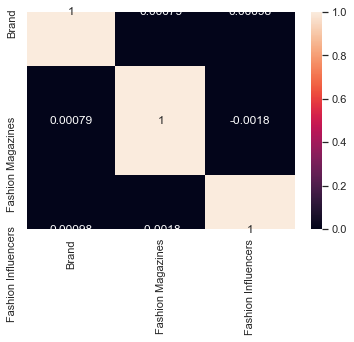

In [300]:
sb.heatmap(get_corr, annot=True)

### Category Analysis:

- Which category has the highest average rating?

In [301]:
df.head(2)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other


In [302]:
category = df.groupby(df['Category'])
category['Rating'].mean().sort_values(ascending = False).to_frame()

,Rating
Category,
Jewelry,3.007955
Activewear,3.006576
Dresses,3.004322
Accessories,3.002339
Tops,2.998859
Footwear,2.998085
Bottoms,2.997579
Lingerie,2.990882
Outerwear,2.990839


- Are certain categories associated with higher prices?

In [303]:
category['Price'].mean()

Category
Accessories    55.054783
Activewear     55.141348
Bottoms        54.810910
Dresses        55.019420
Footwear       55.274107
Jewelry        55.182242
Lingerie       54.944949
Outerwear      54.951326
Swimwear       55.060667
Tops           54.878892
Name: Price, dtype: float64

from the metrics of prices its noted that there are no categories associate with higher prices rather they're all at par

- How does the distribution of style attributes vary across different categories?

In [304]:
df.head(2)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other


In [305]:
df['Style Attributes'].value_counts()

Sporty        26378
Edgy          26319
Bohemian      26227
Casual        26212
Glamorous     26199
Minimalist    26135
Formal        26128
Vintage       26112
Streetwear    26068
Preppy        25855
Glamoro           1
Name: Style Attributes, dtype: int64

In [306]:
category_styles = df.groupby(df['Category'])
category_styles['Style Attributes'].value_counts().to_frame().iloc[0:11]

Style Attributes
Category    Style Attributes                  
Accessories Glamorous                     2655
            Casual                        2650
            Vintage                       2608
            Sporty                        2602
            Formal                        2599
            Minimalist                    2589
            Preppy                        2587
            Streetwear                    2584
            Bohemian                      2573
            Edgy                          2573
            Glamoro                          1

### Size and Color Analysis:

- What are the most common sizes available for each product?

In [307]:
df.head(2)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other


In [308]:
df['Total Sizes'].value_counts()

S, M, L     87424
S, L, XL    87292
M, L, XL    86917
Name: Total Sizes, dtype: int64

In [309]:
df['Available Sizes'].value_counts()

S     65735
XL    65604
L     65251
M     65043
Name: Available Sizes, dtype: int64

In [310]:
product_sizes = df.groupby(df['Product Name'])
product_sizes['Total Sizes'].value_counts().to_frame().head(10)

Total Sizes
Product Name Total Sizes             
A0A0         M, L, XL               3
             S, M, L                2
A0A1         M, L, XL               3
             S, L, XL               1
             S, M, L                1
A0A2         S, L, XL               3
A0A3         M, L, XL               2
             S, L, XL               2
             S, M, L                1
A0A4         M, L, XL               2

- Are there any size preferences among customers based on the purchase history?

In [325]:
cols = ['Product Name', 'Available Sizes', 'Total Sizes']

def encode_data(dataset):
    le = LabelEncoder()
    
    for i in dataset.columns:
        if dataset[i].dtype == 'object':
            dataset[i].columns = le.fit_transform(dataset[i].astype(str))
            
    return dataset

In [326]:
df_copy[cols].corr()

,Product Name,Available Sizes,Total Sizes
Product Name,1.000000,0.000218,-0.000882
Available Sizes,0.000218,1.000000,-0.000139
Total Sizes,-0.000882,-0.000139,1.000000


- Which colors are most popular among customers?

In [327]:
df.head(2)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other


In [330]:
df['Color'].value_counts(normalize = True)*100

Red      25.059912
Green    25.012518
Black    25.006784
Blue     24.920786
Name: Color, dtype: float64

### Season and Time Period Analysis:

- Which season (e.g., Fall/Winter, Spring/Summer) has the highest purchase frequency?
- Do customers tend to make more purchases during the daytime or nighttime?
- Are there any patterns in customer reviews or social media comments based on the time period of their highest purchase?

In [332]:
df.head(2)

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other


In [335]:
seasons_freq = df.groupby(df['Season'])
seasons_freq['Price'].sum().sort_values(ascending = False).to_frame()

,Price
Season,
Fall,2.421147e+06
Spring,2.403714e+06
Summer,2.402674e+06
Winter,2.392132e+06
Spring/Summer,2.389799e+06
Fall/Winter,2.388733e+06


In [339]:
df['Season'].value_counts().sort_values(ascending=False)

Fall             43930
Spring           43678
Fall/Winter      43567
Summer           43539
Spring/Summer    43535
Winter           43384
Name: Season, dtype: int64

In [340]:
df['Time Period Highest Purchase'].value_counts()

Holiday      52551
Daytime      52478
Nighttime    52361
Evening      52141
Weekend      52102
Name: Time Period Highest Purchase, dtype: int64